In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [84]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [85]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

### 하나의 데이터가 어떻게 생겼는데 시각화

In [96]:
df = pd.read_excel('진로변경방법위반.xlsx', engine='openpyxl')
df

,발생일,위도,경도
0,2022-12-31,35.912722,128.822268
1,2022-12-31,37.525827,127.116998
2,2022-12-31,36.784010,127.100098
3,2022-12-31,35.150239,129.058649
4,2022-12-31,37.313497,127.080005
...,...,...,...
72568,2022-01-10,36.357900,127.381144
72569,2022-01-10,37.413610,126.760334
72570,2022-01-10,37.700879,127.045509
72571,2022-01-10,36.357885,127.380701


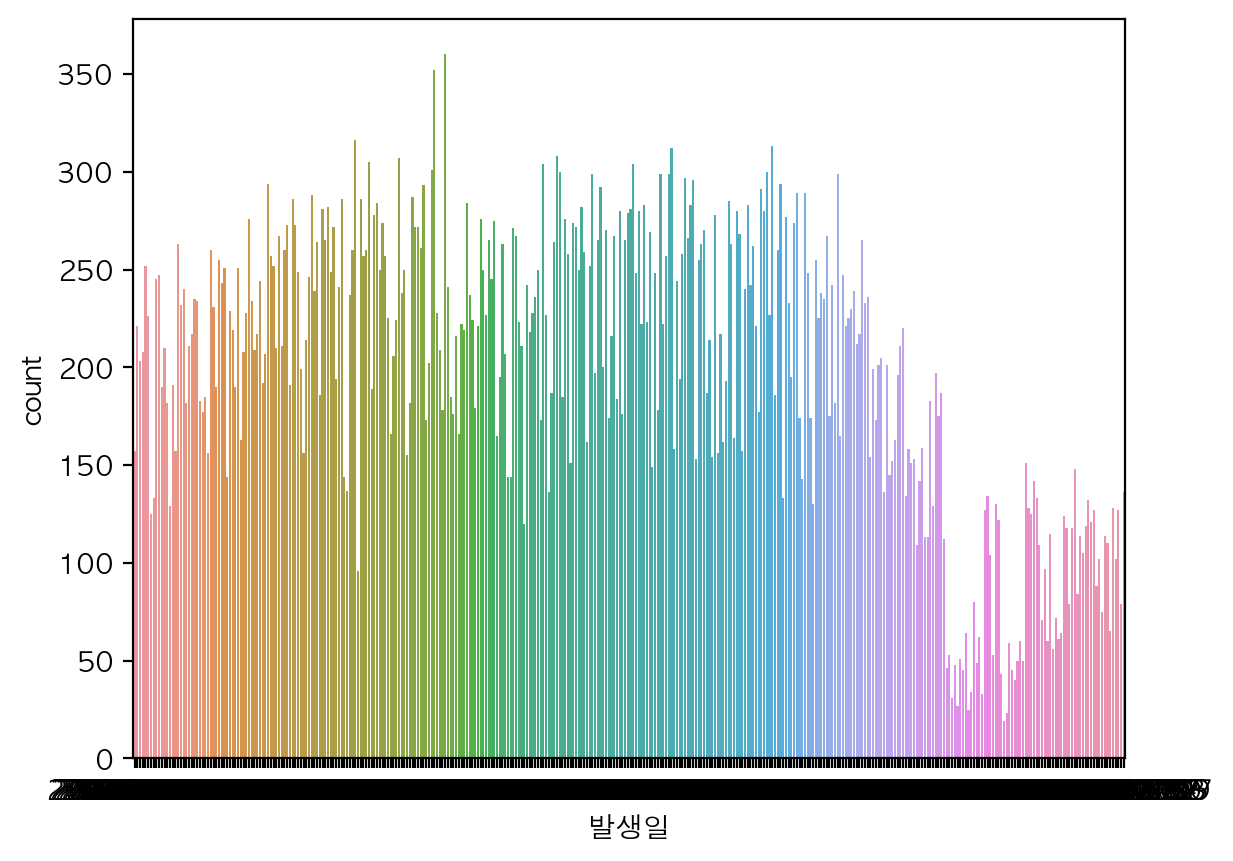

In [57]:
#카운트 막대 그래프
sns.countplot(x = '발생일', data = df)
plt.show()

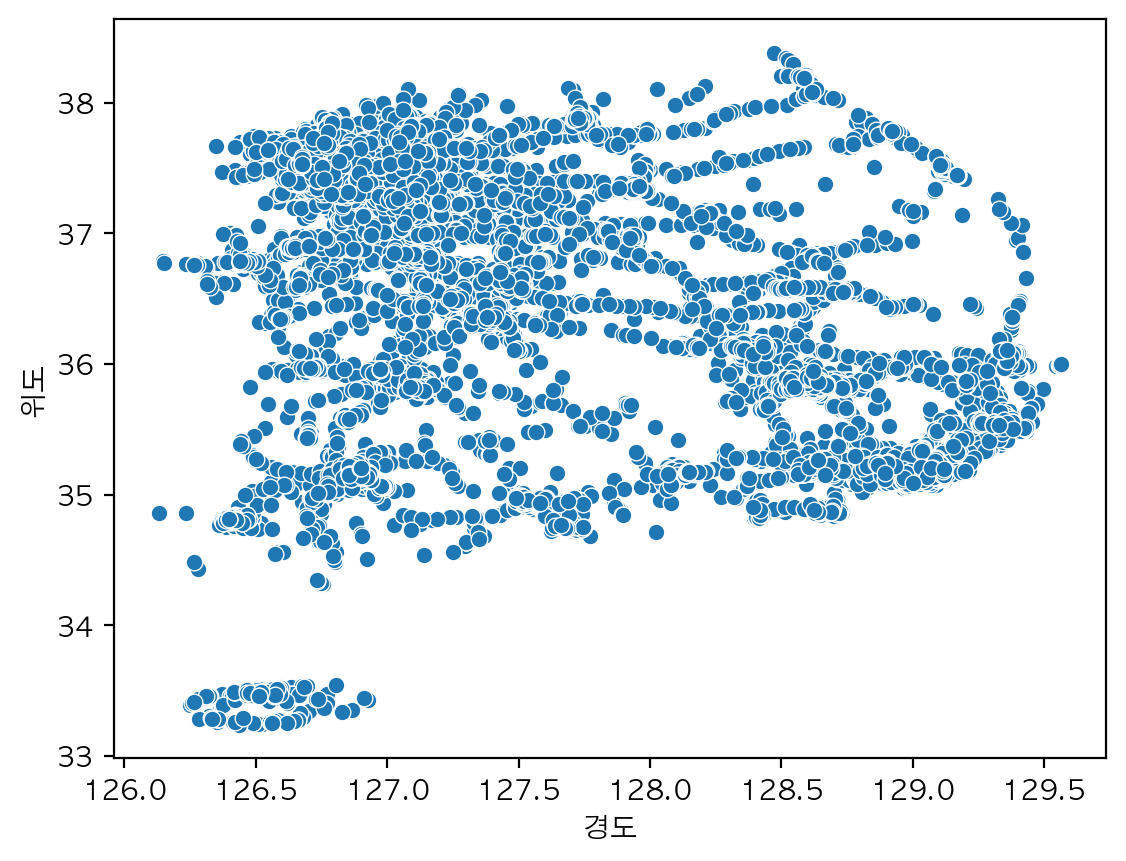

In [58]:
#산포도(스캐터 플롯, Scatter Plot)
sns.scatterplot(x = '경도', y = '위도', data = df)
plt.show()

### 위도, 경도 다 버리고 발생일로 0개 df 다 합치고 싶음

In [74]:
# 진로변경방법
df2 = df.drop(columns=['위도','경도'])
df2

,발생일
0,2022-12-31
1,2022-12-31
2,2022-12-31
3,2022-12-31
4,2022-12-31
...,...
72568,2022-01-10
72569,2022-01-10
72570,2022-01-10
72571,2022-01-10


In [75]:
# "발생일" 컬럼을 datetime으로 변환
df2['발생일'] = pd.to_datetime(df2['발생일'])

# 각 날짜의 발생 횟수를 세어 새로운 데이터프레임 생성
date_counts = df2['발생일'].value_counts().reset_index()
date_counts.columns = ['날짜', '발생횟수']

print(date_counts)

            날짜  발생횟수
0   2022-09-08   360
1   2022-09-07   352
2   2022-10-18   316
3   2022-05-16   313
4   2022-06-08   312
..         ...   ...
359 2022-02-27    31
360 2022-02-26    27
361 2022-03-06    25
362 2022-02-19    23
363 2022-02-12    19

[364 rows x 2 columns]


In [77]:
# 날짜 범위 데이터프레임과 발생횟수 데이터프레임을 병합
result_df = date_df.merge(date_counts, on='날짜', how='left')

# 발생 횟수가 없는 경우 0으로 채움
result_df['발생횟수'] = result_df['발생횟수'].fillna(0)

# 결과 데이터프레임 출력
print(result_df)

            날짜   발생횟수
0   2022-01-01   75.0
1   2022-01-02   65.0
2   2022-01-03  102.0
3   2022-01-04  110.0
4   2022-01-05  114.0
..         ...    ...
360 2022-12-27  252.0
361 2022-12-28  208.0
362 2022-12-29  203.0
363 2022-12-30  221.0
364 2022-12-31  157.0

[365 rows x 2 columns]


In [78]:
# 발생 횟수가 0인날 하루밖에 없음
zero_count_df = result_df[result_df['발생횟수'] == 0]
print(zero_count_df)

            날짜  발생횟수
288 2022-10-16   0.0


### 이제 하나만이 아니라 전체 엑셀파일도 동일하게 df 만들어서처리할거임

In [100]:
# 날짜 범위 생성
start_date = '2022-01-01'
end_date = '2022-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# 날짜 범위를 가지고 있는 데이터프레임 생성
date_df = pd.DataFrame({'날짜': date_range})
date_df

,날짜
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
360,2022-12-27
361,2022-12-28
362,2022-12-29
363,2022-12-30


In [106]:
import pandas as pd

# 결과를 저장할 빈 데이터프레임을 생성합니다.
ㅇㅁ = pd.DataFrame(columns=['날짜'])

# 엑셀 파일 목록
excel_files = ['꼬리물기.xlsx', '불법유턴.xlsx', '불법좌회전.xlsx', '신호위반.xlsx', '역주행.xlsx', '정지선침범.xlsx', '중앙선침범.xlsx', '지정차로위반.xlsx', '진로변경방법위반.xlsx']

# 각 엑셀 파일을 순회하면서 데이터를 추출하고 열을 추가하여 누적합니다.
for file in excel_files:
    
    # 엑셀 파일을 읽어 데이터프레임으로 로드
    df = pd.read_excel(file)
    
    # '위도'와 '경도' 열을 삭제
    df = df.drop(columns=['위도', '경도'])
    
    # 엑셀 파일명에서 .xlsx를 제거하고 열 이름으로 사용
    column_name = file.replace('.xlsx', '')
    
    # '발생일' 열의 값들을 세서 발생횟수 데이터프레임을 만듭니다.
    date_counts = df['발생일'].value_counts().reset_index()
    date_counts.columns = ['날짜', column_name]  # 엑셀 파일명을 열 이름으로 사용

    
    # 결과 데이터프레임과 병합
    if result_df.empty:
        result_df = date_counts
    else:
        result_df = result_df.merge(date_counts, on='날짜', how='left')

# 누적된 발생횟수가 없는 경우 0으로 채움
result_df = result_df.fillna(0)

# 결과 데이터프레임 출력
print(result_df)


             날짜  꼬리물기_x  불법유턴_x  불법좌회전_x  신호위반_x  역주행_x  정지선침범_x  중앙선침범_x  \
0    2022-01-02       1      21       43      96     12       51       40   
1    2022-01-03       2      27       88     125     10       54       39   
2    2022-01-04       2      24      103     137      8       58       35   
3    2022-01-05       3      30      104     157     13       46       64   
4    2022-01-06       4      25      108     147     14       67       48   
..          ...     ...     ...      ...     ...    ...      ...      ...   
338  2022-12-27       7      48      153     203     14       37       63   
339  2022-12-28      14      38      148     161     13       52       56   
340  2022-12-29       7      36      147     191     18       39       51   
341  2022-12-30       7      29      138     155     18       51       71   
342  2022-12-31       9      35      112     119     18       62       54   

     지정차로위반_x  진로변경방법위반_x  꼬리물기_y  불법유턴_y  불법좌회전_y  신호위반_y  역주행_y  정지선침범_y 

In [95]:
# '날짜' 열을 기준으로 데이터프레임을 정렬하고 인덱스를 재설정
date_Df = result_df.sort_values(by='날짜').reset_index(drop=True)

# 정렬된 결과 데이터프레임 출력
print(date_df)

             날짜  꼬리물기  불법유턴  불법좌회전  신호위반  역주행  정지선침범  중앙선침범  지정차로위반  진로변경방법위반
0    2022-01-02     1    21     43    96   12     51     40       8        65
1    2022-01-03     2    27     88   125   10     54     39      19       102
2    2022-01-04     2    24    103   137    8     58     35      23       110
3    2022-01-05     3    30    104   157   13     46     64      24       114
4    2022-01-06     4    25    108   147   14     67     48      19       127
..          ...   ...   ...    ...   ...  ...    ...    ...     ...       ...
338  2022-12-27     7    48    153   203   14     37     63      20       252
339  2022-12-28    14    38    148   161   13     52     56      31       208
340  2022-12-29     7    36    147   191   18     39     51      25       203
341  2022-12-30     7    29    138   155   18     51     71      15       221
342  2022-12-31     9    35    112   119   18     62     54      15       157

[343 rows x 10 columns]
